In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import taichi as ti
import torch

from plb.engine.taichi_env import TaichiEnv
import tqdm
import matplotlib.pyplot as plt
import cv2
import numpy as np

[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-sywv3n1o
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.9.5
[Taichi] Starting on arch=cuda


In [3]:
from plb.config import load
cfg = load(f"../envs/env_configs/chopsticks.yml")

cfg.defrost()
cfg.PRIMITIVES[0]['shape'] = 'Gripper'
cfg.PRIMITIVES[0]['action']['dim'] = 7
del cfg.PRIMITIVES[0]['h']
del cfg.PRIMITIVES[0]['r']
cfg.PRIMITIVES[0]['size'] = (0.05, 0.2, 0.05)
#del cfg.PRIMITIVES[0]['init_gap']
cfg.PRIMITIVES[0]['init_gap'] = 0.2
cfg.PRIMITIVES[0]['minimal_gap'] = 0.15
cfg.PRIMITIVES[0]['friction'] = 50.
cfg.freeze()

In [4]:
ti.init(arch=ti.gpu, debug=False, fast_math=False)
env = TaichiEnv(cfg, nn=False, loss=False)

[Taichi] Starting on arch=cuda
{'width': (0.04, 0.04, 0.6), 'init_pos': (0.5, 0.02, 0.5), 'color': 100}
Building primitive
action:
  dim: 7
  scale: (0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.02)
color: (0.8, 0.8, 0.8)
friction: 50.0
init_gap: 0.2
init_pos: (0.5, 0.15, 0.5)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
mass: 1.0
minimal_gap: 0.15
needs_impact: False
round: 0
shape: Gripper
size: (0.05, 0.2, 0.05)
upper_bound: (1.0, 1.0, 1.0)
variations: None
RESOLUTION (64, 64, 64)
Initialize Renderer
bake_size: 6  
camera_pos: (0.5, 1.2, 4.0)  
camera_rot: (0.2, 0)  
dx: 0.006666666666666667  
image_res: (512, 512)  
light_direction: (2.0, 1.0, 0.7)  
max_num_particles: 1000000  
max_ray_depth: 2  
sdf_threshold: 0.20720000000000002  
spp: 50  
target_res: (64, 64, 64)  
use_directional_light: True  
use_roulette: False  
voxel_res: (168, 168, 168)


In [5]:
env.initialize()
state = env.get_state()

initialize camera at (0.5, 1.2, 4.0) (0.2, 0)


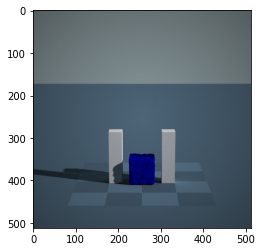

In [6]:
p = state['state'][-1]
#p[7] = 0.3
p[:3] = [0.5, 0.2, 0.5]
p[7] = 0.4
state['state'] = (np.random.random((10000, 3)) * 0.2 + np.array([0.4, 0.0, 0.4]), *state['state'][1:5], )#p)
env.set_state(**state)
env.render('plt')

In [8]:
from plb.lang.utils import animate
env.set_state(**state)
env.renderer.spp = 3
images = []
for i in range(50):
    if i < 10:
        env.step([0,0,0, 0,0,0, 1])
    elif i >= 10 and i<=20:
        env.step([0,1,0, 0,0,0, 0])
    else:
        env.step([0,0,0, 0,1,0, 0])
    img2 = env.render('rgb_array')

    images.append(img2)
animate(images, 'xxx.webm')


animating xxx.webm
Moviepy - Building video xxx.webm.
Moviepy - Writing video xxx.webm



Moviepy - Done !
Moviepy - video ready xxx.webm
